**Student name and BC username**

NAME HERE

BC USERNAME HERE

**Collaborators names and BC usernames (max 2 collaborators)**

+ NAME 1 

+ NAME 2

# <font face = "times"><center>  EC1151 - Homework 7 - Due Oct 28th, 3PM</font> 

<font face="times">
# Instructions
<br>

+ You must fill out this Jupyter notebook and return it by e-mail to baisihad@bc.edu

+ Double click on the cells to edit them

+ For questions that need mathematical notation, try to use $\LaTeX$ if you can.

+ Sometimes, below a question that requires an answer there will be a cell with several `assert` statements. If you can run that cell without generating error, your answer has been validated and you are guaranteed the points.

+ If you're stuck, try posting a question in the Piazza forum. Active contributors will be rewarded.

+ Finally, this is <b>experimental</b>. I'd love to hear what you think about this homework format. You can e-mail me with your thoughts, or (preferrably) post in the Piazza forum (possibly anonymously to your peers).


---

### Remark

In previous homeworks had a neat distinction between theory and computation, but now we have reached a point where it would be very hard to calculate the answers "by hand". Starting from this homework, feel free to use any means you find convenient to get to the final answer, unless instructed otherwise. However, remember to justify your steps so that I can give you partial credit.

---

## Basic concepts [10 points]

**Q0)** Explain the following concepts in your own words. I will grade these generously, so just make sure that your answer is useful for yourself.


a) p-value

b) Significance level

c) Rejection region

d) Reject the null hypothesis

e) Type 1 and Type 2 errors

---

## Coin tosses [30 points]

**Q1)** A coin is tossed 10 times, landing on Heads 9 out of 10 times. We will test the hypothesis

$$H_0: p = \frac{1}{2}$$
against
$$H_1: p \neq \frac{1}{2}$$



a) Explain why an estimator for $p$ is $\hat{p} = 9/10$.

b) Assume that $H_0$ is true. What is the probability of getting $\hat{p} \geq .9$?

In [11]:
p_hyp = .5
1-ss.binom(10, p_hyp).cdf(8)

0.0107421875

c) Because this is a two-tailed test, we want to guard ourselves against extremes on both sides of $p$. So compute what is the probability of getting $\hat{p} \leq .1$.

d) What is the p-value for this test?

e) At a significance level of $\alpha = .05$, do we reject $H_0$?

f) At a significance level $\alpha = 0.01$, do we reject $H_0$?

## Politics [20 points]

**Q2)** Imagine that in a poll of 1000 registered voters, 521 said they'd vote for Donald Trump. We'd like to know the following: do we already have enough evidence to say that *at least 50% of the voters prefer Donald Trump over any other candidate*?

a) Formalize this as a hypothesis testing problem with significance level of $\alpha = 0.1$, and answer the question posed above. 

b) Does your answer change when $\alpha = 0.05$?

c) Suppose that $\alpha = 0.01$. Then how many voters would have to answer they are voting for Donald Trump before you believe that there is enough evidence that at least 50% of the voters prefer him over any other candidate?

[Remark] The easiest way to solve this is by simulation and guessing. However, you can solve this without simulation using inverse of the CDF, denoted by $F^{-1}$. This is most commonly called the *quantile function*, but other names such as the *inverse CDF function*,  *percentile function*, and *percent point function* are also known in the literature. Python uses the last one, so you can compute, say $F^{-1}(.5)$ for the $Binomial(7, .4)$ distribution by typing:

```python
import scipy.stats as ss
ss.binom(7, .4).ppf(.5) 
```

----

## Two-sample test with normal distribution [40 points]

**Q3)** Before we get to the actual testing in the next question, let's do some warm-up exercises.

a) If $X \sim Normal(\mu_x, \sigma_x^2)$ and $Y \sim Normal(\mu_y, \sigma_y^2)$, what are the probability distributions of $X + Y$ and $X - Y$? 

**Remark** The sum of Normally distributed random variables is again Normal. This property is called *sum-stability*. So we know, for example, that $X + Y$ is Normal. But with what parameters? And can we say the same of $X - Y$?

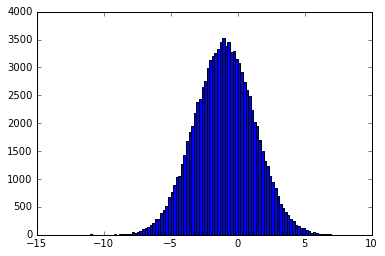

In [14]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = ss.norm(1, 1).rvs(100000)
Y = ss.norm(2, 2).rvs(100000)
plt.hist(X - Y, bins = 100);

In [15]:
np.mean(X - Y), np.var(X - Y)

(-1.0034428160260616, 4.9930272320956011)

b) Now suppose that: 

+ $X_1,\cdots,X_n$ are samples from some distribution with $E[X_i] = \mu_x$ and $Var[X_i] = \sigma_x^2$


+ $Y_1,\cdots,Y_m$ are samples from some (potentially different) distribution with $E[Y_i] = \mu_y$ and $Var[Y_i] = \sigma_y^2$

+ Let $Z = \frac{1}{n}\sum_i X_i$ and $W = \frac{1}{m}\sum_i Y_i$. Assume $n$ is reasonably large. 

What are the probability distributions of $Z + W$ and $Z - W$?

---

**Q4)** A company advertises that their product *Snake Oil 9000* can increase IQ temporarily by 5 points. To prove their claim, they gather 40 patients, divide them into a *treatment group*, which has 15 people in it, and a *control group* with the remaining 25. 

The treatment group is given *Snake Oil* and averages 105 in an IQ test. The control group is given a placebo and average 101 in an IQ test.

Suppose that it is known that the standard deviation of IQ in the control group is $\sigma_c = 6$ and the standard deviation of IQ in the treatment group is $\sigma_t = 5$.

a) Let $\hat{\mu}_t$ and $\hat{\mu}_c$ denote the "sample average of IQ" (not *individual IQ*) in the treatment and control groups, respectively. 

Using the CLT: what are the approximate probability distributions of $\hat{\mu}_t$ and $\hat{\mu}_c$ in terms of $\mu_t = E[\hat{\mu}_t]$, $\mu_c = E[\hat{\mu}_c]$, $\sigma_t$, and $\sigma_c$?

b) Using what you discovered in the last question, compute the probability distribution of $\hat{D} = \hat{\mu}_t - \hat{\mu}_c$.

c) Let $\delta = E[D]$. Test the hypothesis $H_0: \delta \leq 0$ against the hypothesis $H_0: \delta \geq 0$ with significance level $\alpha = 0.01$.

In [9]:
import scipy.stats as ss
import numpy as np
sigma = np.sqrt(36/25 + 25/15)
delta_hyp = 0
ss.norm(delta_hyp, sigma).ppf(0.995)

4.5400894382349524

d) What is the rejection region for this test?